In [3]:
!pip install torchvision



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


import matplotlib.pyplot as plt


In [15]:
#The dataset we will be using fashionMnist 
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data",
    train =True,
    download=True,
    transform=torchvision.transforms.ToTensor(),#transforms the data into tensors
    target_transform=None
)
test_data =datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,#
    transform=ToTensor(),
    target_transform=None
)


In [11]:
len(train_data), len(test_data)

(60000, 10000)

In [13]:
#First training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [17]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [21]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [23]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

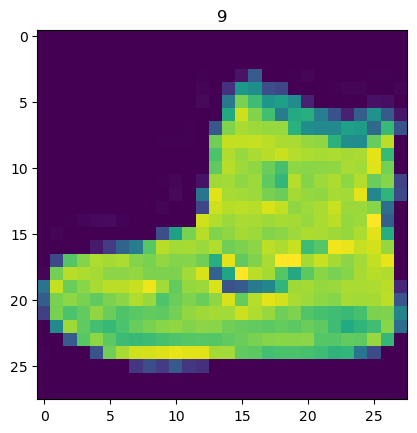

In [35]:
import matplotlib.pyplot as plt
image, label = train_data[0]

plt.imshow(image.squeeze())
plt.title(label);

(-0.5, 27.5, 27.5, -0.5)

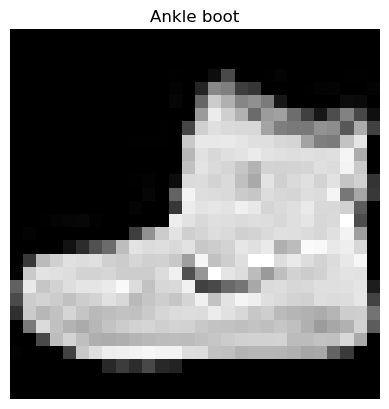

In [43]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


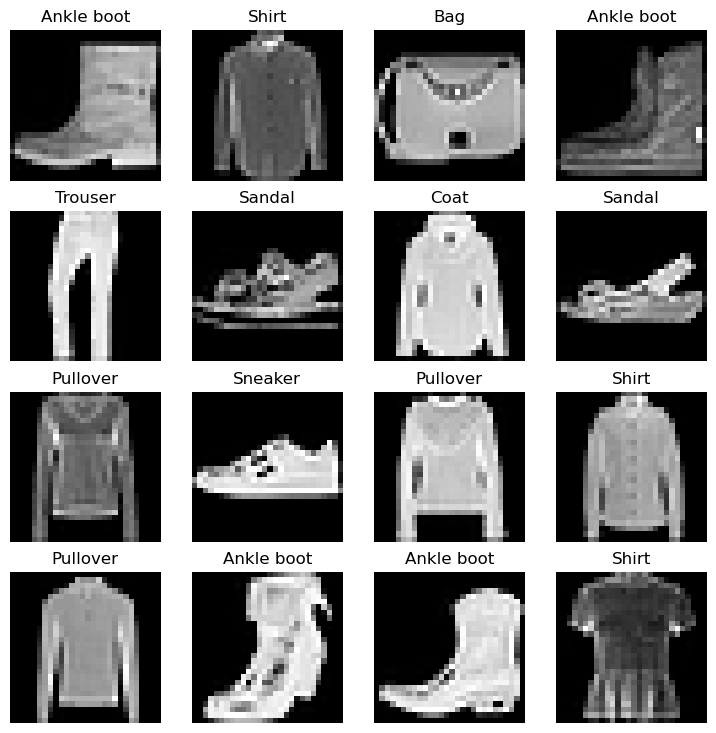

In [53]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0, len(train_data),size=[1]).item()
    print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows,cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [55]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
#Now we have to turn our data into batches (or mini batches)
#It is more computationally efficinet, as in, the computinmg hardware may not be able to look (store in memory) at 60000 images in one hit. 
#It gives our neural network more chances to update it's gradients per epoch.

In [59]:
from torch.utils.data import DataLoader
#Setup the batch size hyperparameter
BATCH_SIZE = 32
#Turn datasets into iterables(batches)
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)
test_dataloader =DataLoader(dataset=test_data,
                            batch_size= BATCH_SIZE,
                            shuffle=False)
train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7f6d5b345940>,
 <torch.utils.data.dataloader.DataLoader at 0x7f6d5b4e7560>)

In [63]:
#Let's check out what we have created 
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f6d5b345940>, <torch.utils.data.dataloader.DataLoader object at 0x7f6d5b4e7560>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [75]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


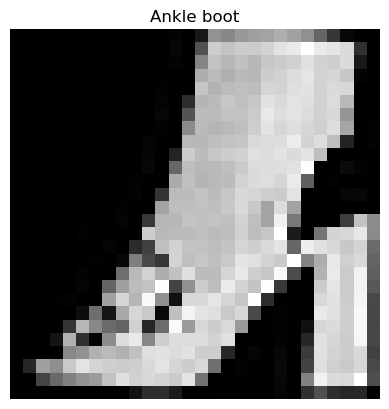

In [79]:
torch.manual_seed(42)
random_idx= torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [85]:
#Create a flatten model
flatten_model = nn.Flatten()

#Get a single sample
x = train_features_batch[0]

output = flatten_model(x)

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [97]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)

In [112]:
torch.manual_seed(42)
#Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [115]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [221]:
#Loss Function
import requests
from pathlib import Path

if Path("help_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

In [150]:
#to import accuracy metric which is accuracy_fn
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)



In [152]:
#Creating a function to time the experiments
#Machine learning is very experimental
# Model's Performance
# How fast it runs
from timeit import default_timer as timer
def print_train_time(start:float,
                    end:float,
                    device:torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [160]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time,device="cpu")


Train time on cpu: 0.000 seconds


3.157000173814595e-05

In [162]:
#Creating a training loop and training a model on batches of data
from tqdm.auto import tqdm

#set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 4

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if batch % 400 ==0:
        print(f"Looked at{batch * len(X)}/{len(train_dataloader.dataset)} samples.")

    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0,0
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)

            test_loss += loss_fn(test_pred,y_test)
            test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /=len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0
-----

Train loss: 0.4308 | Test loss: 0.4587, Test acc: 83.9157
Epoch: 1
-----

Train loss: 0.4270 | Test loss: 0.4607, Test acc: 84.1054
Epoch: 2
-----

Train loss: 0.4227 | Test loss: 0.4629, Test acc: 84.0156
Epoch: 3
-----

Train loss: 0.4187 | Test loss: 0.4561, Test acc: 83.8558
Train time on cpu: 29.662 seconds


In [170]:
str(next(model_0.parameters()).device)

'cpu'

In [283]:
import torch

torch.manual_seed(42)

def eval_model(
    model: torch.nn.Module,  
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn,
    device=device
) -> dict:
    """Returns a dictionary of model evaluation results."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)  
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {
        "model_name": model.__class__.__name__,  
        "model_loss": loss.item(),
        "model_acc": acc
    }


model_0_results = eval_model(
    model=model_0,
    data_loader=test_dataloader,  # Replace with your test DataLoader variable name
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)


model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.45606282353401184,
 'model_acc': 83.85583067092652}

In [284]:
!nvidia-smi

Wed Feb 12 21:43:29 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060 6GB    Off | 00000000:29:00.0  On |                  N/A |
|  0%   38C    P8              13W / 120W |    602MiB /  6144MiB |     34%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [285]:
torch.cuda.is_available()

True

In [287]:
import torch
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [291]:
#Model 1 building a better model with non-linearity 
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
            
        )
    def forward(self,x:torch.Tensor):
        return self.layer_stack(x)

In [293]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [295]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                           lr=0.1)

In [297]:
def train_step(model: torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              optimizer:torch.optim.Optimizer,
              accuracy_fn,
              device= device):
    
    train_loss,train_acc = 0,0
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /=len(data_loader)
    train_acc /=len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}%")

In [309]:
def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device = device):
    test_loss, test_acc = 0, 0
    model.eval()

    #To turn on inference whenever you are doing prediction model
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X).to(device)
            test_loss += loss_fn(test_pred,y)
            test_acc += accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /=len(data_loader)
        print(f"Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [311]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    train_step(model=model_1,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    test_step(model=model_1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train loss: 0.64519 | Train Acc: 76.65%
Test Loss: 0.68914 | Test acc: 75.03%

Epoch: 1
Train loss: 0.62752 | Train Acc: 77.09%
Test Loss: 0.66747 | Test acc: 75.82%

Epoch: 2
Train loss: 0.61555 | Train Acc: 77.36%
Test Loss: 0.64590 | Test acc: 76.36%



In [312]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.45606282353401184,
 'model_acc': 83.85583067092652}

In [315]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6459040641784668,
 'model_acc': 76.35782747603834}

In [319]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.45606282353401184,
 'model_acc': 83.85583067092652}

In [531]:
#Creating a convolitional neural network
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                     out_channels=hidden_units,
                     kernel_size=3,
                     stride=1,
                     padding=1),           #values we can set ourselves in our NN's are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier= nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, #there is a trick to calculating this....
                     out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        return x

In [533]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

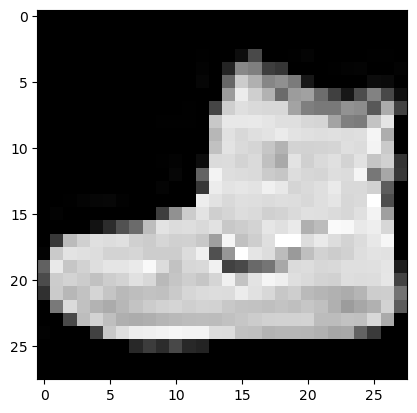

In [535]:
plt.imshow(image.squeeze(), cmap="gray")

In [537]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [539]:
model_2(rand_image_tensor.unsqueeze(dim=0).to(device))

torch.Size([1, 10, 15, 15])
torch.Size([1, 10, 7, 7])


tensor([[ 0.0459, -0.0882,  0.0631, -0.0618,  0.0113,  0.0296,  0.0200,  0.0079,
         -0.0051, -0.0199]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [541]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [543]:
torch.manual_seed(42)
images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"Image batch shape: {image.shape}")
print(f"Single image shape: {image.shape}")
print(f"Test Image:\n {test_image}")

Image batch shape: torch.Size([1, 28, 28])
Single image shape: torch.Size([1, 28, 28])
Test Image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.797

In [545]:
test_image.shape

torch.Size([3, 64, 64])

In [547]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=(3,3),
                      padding=0,
                      stride=1)
#Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [549]:
test_image.shape

torch.Size([3, 64, 64])

In [551]:
max_pool_layer= nn.MaxPool2d(kernel_size=2)
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer():{test_image_through_conv_and_max_pool.shape}")


Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer():torch.Size([1, 10, 31, 31])


In [553]:
torch.manual_seed(42)
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom Tensor:\n {random_tensor}")
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor: \n {max_pool_tensor}")
print(f"\nMax pool tensor shape: \n {max_pool_tensor.shape}")


Random Tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Max pool tensor: 
 tensor([[[[0.3367]]]])

Max pool tensor shape: 
 torch.Size([1, 1, 1, 1])


In [555]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

In [557]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_mode_2 = timer()

epoch = 3
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n--------")
    train_step(model=model_2,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    test_step(model=model_2,
             data_loader= test_dataloader,
             loss_fn = loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

Epoch: 0
--------
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
t

NameError: name 'train_time_start_model_2' is not defined

In [559]:
model_2_results= eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device)
model_2_results

torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 7, 7])
torch.Size([32, 10, 15, 15])
torch.Size([32, 10,

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31605079770088196,
 'model_acc': 88.71805111821087}

In [443]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.45606282353401184,
 'model_acc': 83.85583067092652}

In [561]:
model_1_results


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6459040641784668,
 'model_acc': 76.35782747603834}

In [563]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31605079770088196,
 'model_acc': 88.71805111821087}

In [565]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.456063,83.855831
1,FashionMNISTModelV1,0.645904,76.357827
2,FashionMNISTModelV2,0.316051,88.718051


Text(0, 0.5, 'model')

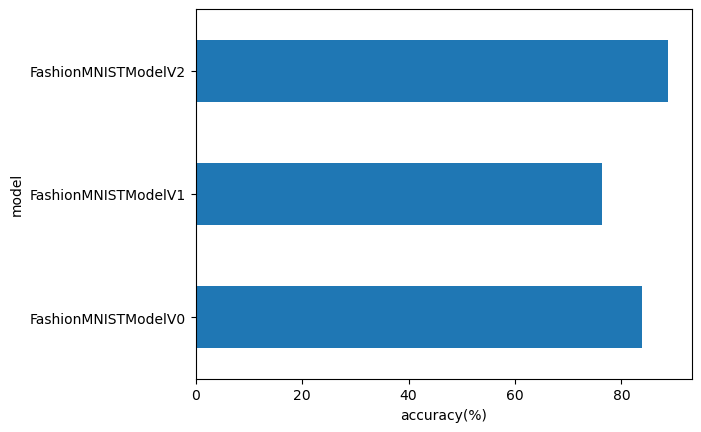

In [567]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy(%)")
plt.ylabel("model")

In [631]:
def make_predictions(model: torch.nn.Module,
                    data:list,
                    device:torch.device = device):
    pred_probs= []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)

            pred_logit=model(sample)
            #Logit to Prediction Probability
            pred_prob =torch.softmax(pred_logit.squeeze(),dim=0)

            #Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    #list to tensor
    return torch.stack(pred_probs)

In [633]:
import random
random.seed(42)
test_samples= []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
    test_samples[0].shape

In [634]:
img , label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Sandal')

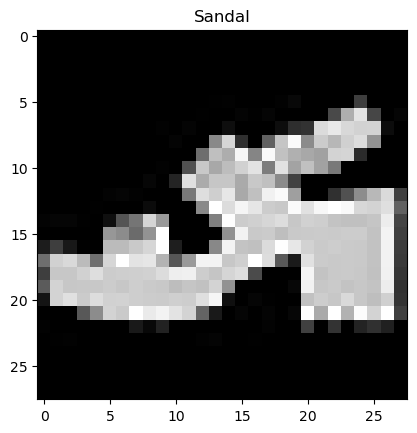

In [635]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [639]:
pred_probs = make_predictions(model=model_2,data=test_samples)
pred_probs[:2]

torch.Size([1, 10, 15, 15])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 15, 15])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 15, 15])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 15, 15])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 15, 15])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 15, 15])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 15, 15])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 15, 15])
torch.Size([1, 10, 7, 7])
torch.Size([1, 10, 15, 15])
torch.Size([1, 10, 7, 7])


tensor([[1.0721e-07, 1.9306e-10, 9.9276e-10, 5.5238e-10, 6.6017e-09, 9.9999e-01,
         1.6805e-07, 1.4300e-07, 6.9918e-07, 1.0016e-05],
        [2.4095e-01, 4.9143e-01, 9.1399e-03, 1.8112e-01, 6.0267e-02, 1.0990e-04,
         1.4813e-02, 7.5967e-04, 5.0116e-04, 9.0614e-04]])

In [643]:
#Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

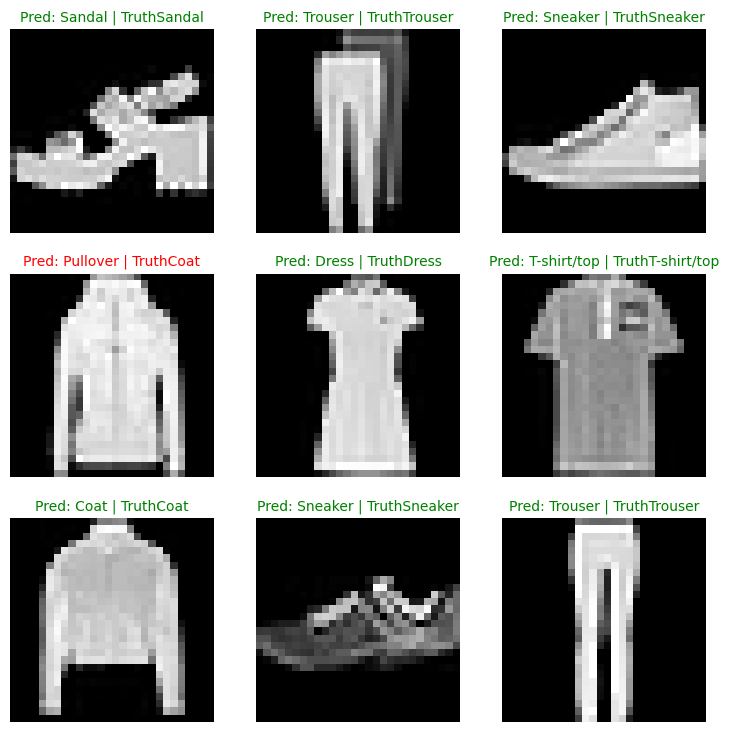

In [653]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows,ncols, i+1)
    plt.imshow(sample.squeeze(),cmap="gray")
    pred_label = class_names[pred_classes[i]]
    truth_label= class_names[test_labels[i]]
    title_text = f"Pred: {pred_label} | Truth{truth_label}"
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False);

In [657]:
pip install mlxtend


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
